# How to interpolate without clusters

In this notebook we explain how MICA interpolates air temperature observations using a Multiple Linear Regression (MLR) with altitude and distance to coast as explanatory variables and an residuals correction. No clusters are considered in this case.

To achieve that, we'll use the PyMica class, which is one of the main classes of the project. So first of all, we'll import it in this notebook.

Let's start!

In [1]:
from pymica.pymica import PyMica

PyMica class receives four parameters:

   - data_file: The path of the .json file with the point data
   - variables_file: A list of the file(s) path(s) containing the fields of the explanatory variables used in the regression. For more information on these fields, please see [Explanatory data](../preprocessing/pre_processing.ipynb) section.
   - clusters: A dictionary with two keys {'clusters_files': path for the clusters definitions, 'mask files': path for the rasterized clusters}. Form more information on these fields, please see [Clusters](../preprocessing/pre_processing.ipynb) section.
   - data_format: A dictionary with the name of the variables in the data file if they are not named as the default option. Defaults to ```{'loc_vars': ('lon', 'lat'), 'id_key': 'id', 'y_var': 'temp', 'x_vars': ('altitude', 'dist')}```



### Defining the parameters of PyMica class

First, we have to define `data_file`, `variables_file`, `clusters` and `data_format` parameters of PyMica class.

In [2]:
data_file = '../sample-data/data/xema_20181231_1400.json'

The first element of sample_data.json is the following:
```json
   {"id": "C6", "temp": 6.4, "altitude": 264, "lon": 0.95172, "lat": 41.6566, "dist": 0.8583929293407604}
```

In [3]:
variables_file = ['../sample-data/explanatory/cat_dem_25831.tif', '../sample-data/explanatory/cat_distance_coast.tif']
clusters = None
data_format = None

And now, we can call the PyMica class.

In [4]:
global_int = PyMica(data_file, variables_file, clusters, data_format)

We can plot a quick look of the resultant air temperature interpolated field using imshow function.

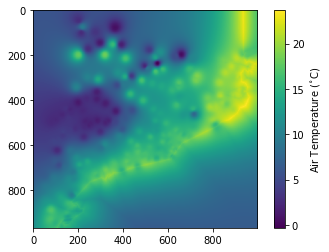

In [7]:
import matplotlib.pyplot as plt
plt.imshow(global_int.result)
cbar = plt.colorbar()
cbar.set_label('Air Temperature ($^{\circ}$C)')
plt.show()

Or we can just save the result into a .tif file using `save_file` function of PyMica class.

In [6]:
global_int.save_file('../sample-data/results/global_int.tif')